2. Linear Regression

From 0 to 1

In [14]:
import random
import torch
import numpy as np
from d2l import torch as d2l

# Generate a set of data (Gassian Distribution)

In [ ]:
def synthetic_data(w,b, num_examples):
    x=torch.normal(0,1,(num_examples,len(w))) # 0:average; 1:standard deviation; (a matrix with num_examples of samples and len(w) of features)
    y=torch.matmul(x,w)+b
    y+=torch.normal(0,0.01, y.shape)   # Noise
    return x,y.reshape(-1,1)
true_w=torch.tensor([2,-3.4])
true_b=4.2
features, labels=synthetic_data(true_w, true_b,1000)
    

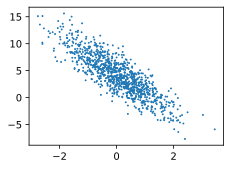

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),    #split the tensor from the gradient
                labels.detach().numpy(),1);

In [20]:
def data_iter(batch_size,features, labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=np.array(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size=10
for x,y in data_iter(batch_size, features,labels):
    print(x, '\n', y)
    break                               # We only get one batch because of the 'break' here.

tensor([[ 1.5153,  2.1506],
        [-0.0100, -0.1775],
        [ 1.4998, -0.4055],
        [-0.8271,  1.9834],
        [ 0.6647, -1.2666],
        [ 0.2333,  1.1047],
        [-0.7029, -0.4031],
        [-0.2670,  1.3880],
        [-0.6292, -1.6276],
        [-1.0670, -0.5552]]) 
 tensor([[-0.0915],
        [ 4.7945],
        [ 8.5877],
        [-4.2001],
        [ 9.8304],
        [ 0.9030],
        [ 4.1624],
        [-1.0492],
        [ 8.4643],
        [ 3.9715]])


In [17]:
w=torch.normal(0,0.01,size=(2,1), requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [18]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [ ]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2  # y_hat: Prediction y: Ground Truth

In [24]:
def sgd(params,lr, batch_size):
    with torch.no_grad():           # Only the training process needs to record the gradients 
        for param in params:
            param-=lr*param.grad/batch_size # The param.grad means the derivation of the loss function by the param
            param.grad.zero_()

In [26]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        l=loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch {epoch+1},loss{float(train_l.mean()):f}')

epoch 1,loss0.000048
epoch 2,loss0.000048
epoch 3,loss0.000048


Use the packs

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w=torch.tensor([2,-3.4])
true_b=4.2
features, labels = d2l.synthetic_data(true_w, true_b,1000)

In [2]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset=data.TensorDataset(*data_arrays) # * is the unpacking symbol of the tuple
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size=10
data_iter=load_array((features,labels),batch_size)

next(iter(data_iter))

[tensor([[ 0.8736, -0.3205],
         [-0.4583, -0.6527],
         [ 0.1424, -0.4799],
         [ 1.2557, -1.8523],
         [-0.5395, -0.3546],
         [ 0.0673,  1.6859],
         [-0.0670,  0.8302],
         [-0.8110,  1.9947],
         [ 0.4222,  0.2517],
         [-1.7020, -1.5648]]),
 tensor([[ 7.0535],
         [ 5.4845],
         [ 6.1076],
         [13.0027],
         [ 4.3317],
         [-1.3981],
         [ 1.2567],
         [-4.1939],
         [ 4.1734],
         [ 6.1133]])]

In [3]:
from torch import nn
net=nn.Sequential(nn.Linear(2,1))  # Sequential: List of layers   Linear regresion=Fully connected layer
net[0].weight.data.normal_(0,0.01) # Use Gaussian Distribution to replace the original weight 
net[0].bias.data.fill_(0) 

tensor([0.])

In [4]:
loss=nn.MSELoss()
trainer=torch.optim.SGD(net.parameters(), lr=0.03)  # The parameters include w and b


In [ ]:
num_epochs=3
for epoch in range(num_epochs):
    for x, y  in data_iter:
        l=loss(net(x),y)
        trainer.zero_grad()
        l.backward()              # Calculate the gradients
        trainer.step()            # Update the parameters from the loss
    l=loss(net(features),labels)
    print(f'epoch{epoch+1}, loss{l:f}')

epoch1, loss0.000207
epoch2, loss0.000098
epoch3, loss0.000098
